<a href="https://colab.research.google.com/github/ambit741235WHJR/colaboratory-notebooks/blob/main/Banknote%20Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/File uploads/BankNote_Authentication.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


[Text(0, 0.5, 'FORGED'), Text(0, 1.5, 'AUTHORIZED')]

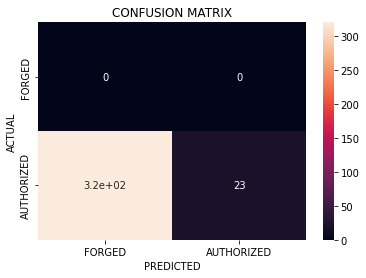

In [ ]:
from sklearn.model_selection import train_test_split
skewness = df["skewness"]
variance = df['variance']
skewness_train, skewness_test, variance_train, variance_test = train_test_split(skewness, variance, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression
x = np.reshape(skewness_train.ravel(), (len(skewness_train), 1))
y = np.reshape(variance_train.ravel(), (len(variance_train), 1))
classifier = LogisticRegression(random_state = 0)
classifier.fit(x.astype('int'), y.astype('int'))
x_test = np.reshape(skewness_test.ravel(), (len(skewness_test), 1))
y_test = np.reshape(variance_test.ravel(), (len(variance_test), 1))

skewness_prediction = classifier.predict(x_test)
predicted_values = []
for i in skewness_prediction:
  if i == 0:
    predicted_values.append("AUTHORIZED")
  else:
    predicted_values.append("FORGED")

actual_values = []
for i in y_test.ravel():
  if i == 0:
    actual_values.append("AUTHORIZED")
  else:
    actual_values.append("FORGED")

labels = ["FORGED", "AUTHORIZED"]
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(actual_values, predicted_values)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel("PREDICTED")
ax.set_ylabel("ACTUAL")
ax.set_title("CONFUSION MATRIX")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)